In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [17]:
#Analyse von:
#Fahrten zu versch. Uhrzeiten und Jahreszeiten
#Wochenende vs. Wochentage
#Auslastung der Bikes an versch. Tagen
#Nutzung von Customern vs Subscriber

In [54]:
chicago = pd.read_csv("chicago_2016.csv", parse_dates=["start_time","end_time"])

In [55]:
user = chicago["user_type"].unique()
print(user)


['Subscriber' 'Customer' 'Dependent']


In [63]:
chicago['driving_time'] = chicago['end_time']-chicago['start_time']
dep = chicago[chicago['user_type']=='Dependent']
print(dep['start_time'].size)
print(dep['start_station_id'].unique().size)
print(dep['end_station_id'].unique().size)
print(dep['bike_id'].unique().size)
dep.head(40)

40
8
8
32


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time
1593452,2016-09-21 13:17:34,2016-09-21 13:30:38,120,207,Wentworth Ave & Archer Ave,Emerald Ave & 28th St,2376,Dependent,0 days 00:13:04
1730294,2016-09-12 17:09:37,2016-09-12 17:21:38,339,207,Emerald Ave & 31st St,Emerald Ave & 28th St,4874,Dependent,0 days 00:12:01
1731826,2016-09-12 16:16:02,2016-09-12 16:19:20,207,339,Emerald Ave & 28th St,Emerald Ave & 31st St,4874,Dependent,0 days 00:03:18
2008251,2016-08-25 13:05:00,2016-08-25 13:15:29,132,207,Wentworth Ave & 24th St,Emerald Ave & 28th St,478,Dependent,0 days 00:10:29
2088667,2016-08-20 07:44:05,2016-08-20 07:47:32,207,206,Emerald Ave & 28th St,Halsted St & Archer Ave,4619,Dependent,0 days 00:03:27
2143957,2016-08-16 14:22:06,2016-08-16 14:34:10,209,207,Normal Ave & Archer Ave,Emerald Ave & 28th St,4177,Dependent,0 days 00:12:04
2144642,2016-08-16 13:27:23,2016-08-16 13:32:47,207,209,Emerald Ave & 28th St,Normal Ave & Archer Ave,4177,Dependent,0 days 00:05:24
2232523,2016-08-10 11:57:35,2016-08-10 12:08:42,193,339,State St & 29th St,Emerald Ave & 31st St,3865,Dependent,0 days 00:11:07
2239695,2016-08-09 19:59:25,2016-08-09 20:21:01,207,339,Emerald Ave & 28th St,Emerald Ave & 31st St,2736,Dependent,0 days 00:21:36
2268453,2016-08-08 09:30:56,2016-08-08 09:42:04,207,132,Emerald Ave & 28th St,Wentworth Ave & 24th St,5305,Dependent,0 days 00:11:08


In [5]:
bikes = chicago['bike_id'].unique()
len(bikes)

5748

In [6]:
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber


In [7]:
chicago['driving_time'] = chicago['end_time']-chicago['start_time'] 

In [8]:
def get_weekday (ts):
    return ts.weekday()
def get_hour (ts):
    return ts.hour
def get_date (ts):
    return ts.date()
chicago["Date"] = chicago["start_time"].apply(lambda x: get_date (x))
chicago["Weekday"]=chicago["start_time"].apply(lambda x: get_weekday (x))
chicago["Hour"]=chicago["start_time"].apply(lambda x: get_hour (x))
chicago.head(3)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time,Date,Weekday,Hour
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00,2016-03-31,3,23
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00,2016-03-31,3,23
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber,0 days 00:04:00,2016-03-31,3,23


In [9]:
montag = chicago[chicago["Weekday"]==0].size
dienstag = chicago[chicago["Weekday"]==1].size
mittwoch = chicago[chicago["Weekday"]==2].size
donnerstag = chicago[chicago["Weekday"]==3].size
freitag = chicago[chicago["Weekday"]==4].size
samstag = chicago[chicago["Weekday"]==5].size
sonntag = chicago[chicago["Weekday"]==6].size

print(montag)
print(dienstag)
print(mittwoch)
print(donnerstag)
print(freitag)
print(samstag)
print(sonntag)

weekdaysize = pd.DataFrame({'Weekday': ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 'Rides': [montag, dienstag, mittwoch, donnerstag, freitag, samstag, sonntag]})

6626172
6500520
5757120
6027576
6351396
6026112
5855700


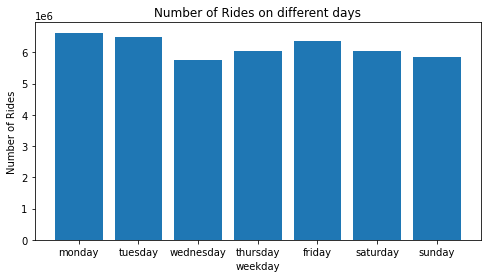

In [10]:
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(weekdaysize["Weekday"], weekdaysize["Rides"])
ax.set_xlabel("weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides on different days")

plt.show()

In [11]:
weekmorning= pd.DataFrame({'Weekday': ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 'Rides': [chicago[(chicago['Weekday']==0) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==1) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==2) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==3) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==4) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==5) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size ,chicago[(chicago['Weekday']==6) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size ] })

     Weekday    Rides
0     monday  1246212
1    tuesday  1374312
2  wednesday  1275096
3   thursday  1240080
4     friday  1252980
5   saturday   299760
6     sunday   233676


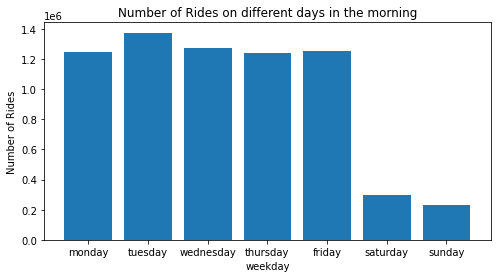

In [18]:
print(weekmorning)
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(weekmorning["Weekday"], weekmorning["Rides"])
ax.set_xlabel("weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides on different days in the morning")

plt.show()

In [13]:
## Jahresschwankungen


In [14]:
def get_month (ts):
    return ts.month
chicago["Month"]=chicago["start_time"].apply(lambda x: get_month (x))
chicago.head(2)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time,Date,Weekday,Hour,Month
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00,2016-03-31,3,23,3
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00,2016-03-31,3,23,3


In [29]:
jan = chicago[chicago["Month"]==1].size
feb = chicago[chicago["Month"]==2].size
mer = chicago[chicago["Month"]==3].size
apr = chicago[chicago["Month"]==4].size
mai = chicago[chicago["Month"]==5].size
juni = chicago[chicago["Month"]==6].size
juli = chicago[chicago["Month"]==7].size
aug = chicago[chicago["Month"]==8].size
sep = chicago[chicago["Month"]==9].size
okt = chicago[chicago["Month"]==10].size
nov = chicago[chicago["Month"]==11].size
dez = chicago[chicago["Month"]==12].size


In [30]:
year= pd.DataFrame({'Months': [ 'january' , 'feburary' , 'march' , 'april' , 'may' ,  'june' , 'july' , 'august' , 'september' , 'october' , 'november', 'december'], 'Rides': [  chicago[chicago['Month']==1].size , chicago[chicago['Month']==2].size , chicago[chicago['Month']==3].size , chicago[chicago['Month']==4].size , chicago[chicago['Month']==5].size , chicago[chicago['Month']==6].size , chicago[chicago['Month']==7].size , chicago[chicago['Month']==8].size , chicago[chicago['Month']==9].size , chicago[chicago['Month']==10].size , chicago[chicago['Month']==11].size , chicago[chicago['Month']==12].size ,]})
print(year)

       Months    Rides
0     january  1206907
1    feburary  1535560
2       march  2417402
3       april  3011255
4         may  4723147
5        june  6212349
6        july  6735209
7      august  6298812
8   september  5709522
9     october  4552522
10   november  3125304
11   december  1211990


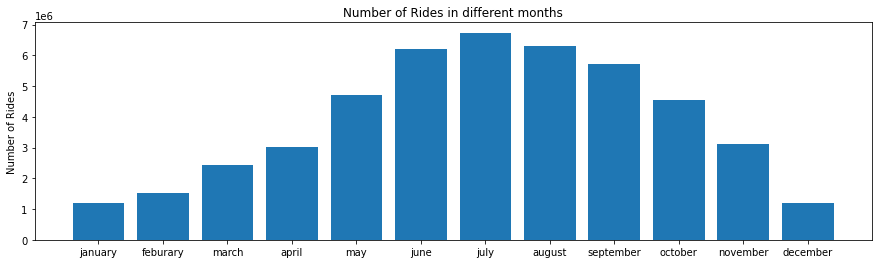

In [31]:
fig,ax = plt.subplots(figsize=(15,4))

ax.bar(year["Months"], year["Rides"])
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides in different months")

plt.show()

In [32]:
morning_start = chicago[(chicago['Hour']>=6) & (chicago['Hour']<10)]
mid_morning_start = chicago[(chicago['Hour']>=10) & (chicago['Hour']<12)]
noon_start = chicago[(chicago['Hour']>=12) & (chicago['Hour']<14)]
afternoon_start = chicago[(chicago['Hour']>=14) & (chicago['Hour']<17)]
evening_start = chicago[(chicago['Hour']>=17) & (chicago['Hour']<21)]
night_start = chicago[((chicago['Hour']>=21) & (chicago['Hour']<24)) | ((chicago['Hour']>=0) & (chicago['Hour']<6))]

In [33]:
# Fahrten am Morgen innerhalb einer Woche
morning_monday = morning_start[morning_start['Weekday']==0]
morning_tuesday = morning_start[morning_start['Weekday']==1]
morning_wednesday = morning_start[morning_start['Weekday']==2]
morning_thursday = morning_start[morning_start['Weekday']==3]
morning_friday = morning_start[morning_start['Weekday']==4]
morning_saturday = morning_start[morning_start['Weekday']==5]
morning_sunday =  morning_start[morning_start['Weekday']==6]
morning_rides = np.array([morning_monday['Hour'].size, morning_tuesday['Hour'].size, morning_wednesday['Hour'].size,  morning_thursday['Hour'].size,  morning_friday['Hour'].size,  morning_saturday['Hour'].size,  morning_sunday['Hour'].size])

In [34]:
# Fahrten am Vormittag innerhalb einer Woche
midmorning_monday = mid_morning_start[mid_morning_start['Weekday']==0]
midmorning_tuesday = mid_morning_start[mid_morning_start['Weekday']==1]
midmorning_wednesday = mid_morning_start[mid_morning_start['Weekday']==2]
midmorning_thursday = mid_morning_start[mid_morning_start['Weekday']==3]
midmorning_friday = mid_morning_start[mid_morning_start['Weekday']==4]
midmorning_saturday = mid_morning_start[mid_morning_start['Weekday']==5]
midmorning_sunday =  mid_morning_start[mid_morning_start['Weekday']==6]
midmorning_rides = np.array([midmorning_monday['Hour'].size, midmorning_tuesday['Hour'].size, midmorning_wednesday['Hour'].size,  midmorning_thursday['Hour'].size,  midmorning_friday['Hour'].size,  midmorning_saturday['Hour'].size,  midmorning_sunday['Hour'].size])

# Fahrten am Mittag innerhalb einer Woche
noon_monday = noon_start[noon_start['Weekday']==0]
noon_tuesday = noon_start[noon_start['Weekday']==1]
noon_wednesday = noon_start[noon_start['Weekday']==2]
noon_thursday = noon_start[noon_start['Weekday']==3]
noon_friday = noon_start[noon_start['Weekday']==4]
noon_saturday = noon_start[noon_start['Weekday']==5]
noon_sunday =  noon_start[noon_start['Weekday']==6]
noon_rides = np.array([noon_monday['Hour'].size, noon_tuesday['Hour'].size, noon_wednesday['Hour'].size,  noon_thursday['Hour'].size,  noon_friday['Hour'].size, noon_saturday['Hour'].size, noon_sunday['Hour'].size])

# Fahrten am Nachmittag innerhalb einer Woche
afternoon_monday = afternoon_start[afternoon_start['Weekday']==0]
afternoon_tuesday = afternoon_start[afternoon_start['Weekday']==1]
afternoon_wednesday = afternoon_start[afternoon_start['Weekday']==2]
afternoon_thursday = afternoon_start[afternoon_start['Weekday']==3]
afternoon_friday = afternoon_start[afternoon_start['Weekday']==4]
afternoon_saturday = afternoon_start[afternoon_start['Weekday']==5]
afternoon_sunday =  afternoon_start[afternoon_start['Weekday']==6]
afternoon_rides = np.array([afternoon_monday['Hour'].size, afternoon_tuesday['Hour'].size, afternoon_wednesday['Hour'].size,  afternoon_thursday['Hour'].size,  afternoon_friday['Hour'].size, afternoon_saturday['Hour'].size, afternoon_sunday['Hour'].size])

# Fahrten am Abend innerhalb einer Woche
evening_monday = evening_start[evening_start['Weekday']==0]
evening_tuesday = evening_start[evening_start['Weekday']==1]
evening_wednesday = evening_start[evening_start['Weekday']==2]
evening_thursday = evening_start[evening_start['Weekday']==3]
evening_friday = evening_start[evening_start['Weekday']==4]
evening_saturday = evening_start[evening_start['Weekday']==5]
evening_sunday =  evening_start[evening_start['Weekday']==6]
evening_rides = np.array([evening_monday['Hour'].size, evening_tuesday['Hour'].size, evening_wednesday['Hour'].size,  evening_thursday['Hour'].size,  evening_friday['Hour'].size, evening_saturday['Hour'].size, evening_sunday['Hour'].size])

# nächtliche Fahrten innerhalb einer Woche
night_monday = night_start[night_start['Weekday']==0]
night_tuesday = night_start[night_start['Weekday']==1]
night_wednesday = night_start[night_start['Weekday']==2]
night_thursday = night_start[night_start['Weekday']==3]
night_friday = night_start[night_start['Weekday']==4]
night_saturday = night_start[night_start['Weekday']==5]
night_sunday =  night_start[night_start['Weekday']==6]
night_rides = np.array([night_monday['Hour'].size, night_tuesday['Hour'].size, night_wednesday['Hour'].size,  night_thursday['Hour'].size,  night_friday['Hour'].size, night_saturday['Hour'].size, night_sunday['Hour'].size])

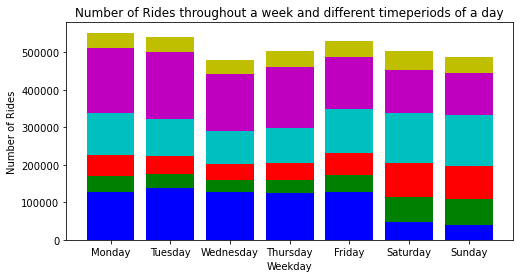

[[126783 137689 127758 125320 128384  46884  39095]
 [ 43126  37351  32643  34550  43305  68504  68732]
 [ 57273  47325  40636  43686  59599  89085  90056]
 [111696 100558  89041  95029 117981 134687 136072]
 [173587 177376 152198 162687 138344 113261 110950]
 [ 39716  41411  37484  41026  41670  49755  43070]]


In [35]:
# Graph der die Anzahl der Fahrten innerhalb einer Woche und in verschiedenen Zeitperioden darstellt 
fig,ax = plt.subplots(figsize=(8,4))
weekly_rides_morning =pd.Series([morning_start[morning_start['Weekday']==0].size, morning_start[morning_start['Weekday']==1].size])
weekdays= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([morning_rides, midmorning_rides, noon_rides, afternoon_rides, evening_rides, night_rides])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week and different timeperiods of a day")

plt.show()
print(data)

In [36]:
#Subscriber
morning_start_sub = chicago[(chicago['Hour']>=6) & (chicago['Hour']<10) & (chicago['user_type']=='Subscriber')]
mid_morning_start_sub = chicago[(chicago['Hour']>=10) & (chicago['Hour']<12)& (chicago['user_type']=='Subscriber')]
noon_start_sub = chicago[(chicago['Hour']>=12) & (chicago['Hour']<14)& (chicago['user_type']=='Subscriber')]
afternoon_start_sub = chicago[(chicago['Hour']>=14) & (chicago['Hour']<17)& (chicago['user_type']=='Subscriber')]
evening_start_sub = chicago[(chicago['Hour']>=17) & (chicago['Hour']<21)& (chicago['user_type']=='Subscriber')]
night_start_sub = chicago[((chicago['Hour']>=21) &  (chicago['user_type']=='Subscriber') &(chicago['Hour']<24)) | ((chicago['Hour']>=0) & (chicago['Hour']<6))]
#Customer
morning_start_cust = chicago[(chicago['Hour']>=6) & (chicago['Hour']<10) & (chicago['user_type']=='Customer')]
mid_morning_start_cust = chicago[(chicago['Hour']>=10) & (chicago['Hour']<12)& (chicago['user_type']=='Customer')]
noon_start_cust = chicago[(chicago['Hour']>=12) & (chicago['Hour']<14)& (chicago['user_type']=='Customer')]
afternoon_start_cust = chicago[(chicago['Hour']>=14) & (chicago['Hour']<17)& (chicago['user_type']=='Customer')]
evening_start_cust = chicago[(chicago['Hour']>=17) & (chicago['Hour']<21)& (chicago['user_type']=='Customer')]
night_start_cust = chicago[((chicago['Hour']>=21) &  (chicago['user_type']=='Customer') &(chicago['Hour']<24)) | ((chicago['Hour']>=0) & (chicago['Hour']<6))]
cust = chicago[chicago['user_type']=='Customer']
sub = chicago[chicago['user_type']=='Subscriber']
print(cust['start_time'].size)
print(sub['start_time'].size)

858474
2736869


In [37]:
#SUBSCRIBER
# Fahrten am Morgen innerhalb einer Woche
morning_monday_sub = morning_start_sub[morning_start_sub['Weekday']==0]
morning_tuesday_sub = morning_start_sub[morning_start_sub['Weekday']==1]
morning_wednesday_sub = morning_start_sub[morning_start_sub['Weekday']==2]
morning_thursday_sub = morning_start_sub[morning_start_sub['Weekday']==3]
morning_friday_sub = morning_start_sub[morning_start_sub['Weekday']==4]
morning_saturday_sub = morning_start_sub[morning_start_sub['Weekday']==5]
morning_sunday_sub =  morning_start_sub[morning_start_sub['Weekday']==6]
morning_rides_sub = np.array([morning_monday_sub['Hour'].size, morning_tuesday_sub['Hour'].size, morning_wednesday_sub['Hour'].size,  morning_thursday_sub['Hour'].size,  morning_friday_sub['Hour'].size,  morning_saturday_sub['Hour'].size,  morning_sunday_sub['Hour'].size])

# Fahrten am Vormittag innerhalb einer Woche
midmorning_monday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==0]
midmorning_tuesday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==1]
midmorning_wednesday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==2]
midmorning_thursday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==3]
midmorning_friday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==4]
midmorning_saturday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==5]
midmorning_sunday_sub =  mid_morning_start_sub[mid_morning_start_sub['Weekday']==6]
midmorning_rides_sub = np.array([midmorning_monday_sub['Hour'].size, midmorning_tuesday_sub['Hour'].size, midmorning_wednesday_sub['Hour'].size,  midmorning_thursday_sub['Hour'].size,  midmorning_friday_sub['Hour'].size,  midmorning_saturday_sub['Hour'].size,  midmorning_sunday_sub['Hour'].size])

# Fahrten am Mittag innerhalb einer Woche
noon_monday_sub = noon_start_sub[noon_start_sub['Weekday']==0]
noon_tuesday_sub = noon_start_sub[noon_start_sub['Weekday']==1]
noon_wednesday_sub = noon_start_sub[noon_start_sub['Weekday']==2]
noon_thursday_sub = noon_start_sub[noon_start_sub['Weekday']==3]
noon_friday_sub = noon_start_sub[noon_start_sub['Weekday']==4]
noon_saturday_sub = noon_start_sub[noon_start_sub['Weekday']==5]
noon_sunday_sub =  noon_start_sub[noon_start_sub['Weekday']==6]
noon_rides_sub = np.array([noon_monday_sub['Hour'].size, noon_tuesday_sub['Hour'].size, noon_wednesday_sub['Hour'].size,  noon_thursday_sub['Hour'].size,  noon_friday_sub['Hour'].size, noon_saturday_sub['Hour'].size, noon_sunday_sub['Hour'].size])

# Fahrten am Nachmittag innerhalb einer Woche
afternoon_monday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==0]
afternoon_tuesday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==1]
afternoon_wednesday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==2]
afternoon_thursday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==3]
afternoon_friday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==4]
afternoon_saturday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==5]
afternoon_sunday_sub =  afternoon_start_sub[afternoon_start_sub['Weekday']==6]
afternoon_rides_sub = np.array([afternoon_monday_sub['Hour'].size, afternoon_tuesday_sub['Hour'].size, afternoon_wednesday_sub['Hour'].size,  afternoon_thursday_sub['Hour'].size,  afternoon_friday_sub['Hour'].size, afternoon_saturday_sub['Hour'].size, afternoon_sunday_sub['Hour'].size])

# Fahrten am Abend innerhalb einer Woche
evening_monday_sub = evening_start_sub[evening_start_sub['Weekday']==0]
evening_tuesday_sub = evening_start_sub[evening_start_sub['Weekday']==1]
evening_wednesday_sub = evening_start_sub[evening_start_sub['Weekday']==2]
evening_thursday_sub = evening_start_sub[evening_start_sub['Weekday']==3]
evening_friday_sub = evening_start_sub[evening_start_sub['Weekday']==4]
evening_saturday_sub = evening_start_sub[evening_start_sub['Weekday']==5]
evening_sunday_sub =  evening_start_sub[evening_start_sub['Weekday']==6]
evening_rides_sub = np.array([evening_monday_sub['Hour'].size, evening_tuesday_sub['Hour'].size, evening_wednesday_sub['Hour'].size,  evening_thursday_sub['Hour'].size,  evening_friday_sub['Hour'].size, evening_saturday_sub['Hour'].size, evening_sunday_sub['Hour'].size])

# nächtliche Fahrten innerhalb einer Woche
night_monday_sub = night_start_sub[night_start_sub['Weekday']==0]
night_tuesday_sub = night_start_sub[night_start_sub['Weekday']==1]
night_wednesday_sub = night_start_sub[night_start_sub['Weekday']==2]
night_thursday_sub = night_start_sub[night_start_sub['Weekday']==3]
night_friday_sub = night_start_sub[night_start_sub['Weekday']==4]
night_saturday_sub = night_start_sub[night_start_sub['Weekday']==5]
night_sunday_sub =  night_start_sub[night_start_sub['Weekday']==6]
night_rides_sub = np.array([night_monday_sub['Hour'].size, night_tuesday_sub['Hour'].size, night_wednesday_sub['Hour'].size,  night_thursday_sub['Hour'].size,  night_friday_sub['Hour'].size, night_saturday_sub['Hour'].size, night_sunday_sub['Hour'].size])

#CUSTOMER
# Fahrten am Morgen innerhalb einer Woche
morning_monday_cust = morning_start_cust[morning_start_cust['Weekday']==0]
morning_tuesday_cust = morning_start_cust[morning_start_cust['Weekday']==1]
morning_wednesday_cust = morning_start_cust[morning_start_cust['Weekday']==2]
morning_thursday_cust = morning_start_cust[morning_start_cust['Weekday']==3]
morning_friday_cust = morning_start_cust[morning_start_cust['Weekday']==4]
morning_saturday_cust = morning_start_cust[morning_start_cust['Weekday']==5]
morning_sunday_cust =  morning_start_cust[morning_start_cust['Weekday']==6]
morning_rides_cust = np.array([morning_monday_cust['Hour'].size, morning_tuesday_cust['Hour'].size, morning_wednesday_cust['Hour'].size,  morning_thursday_cust['Hour'].size,  morning_friday_cust['Hour'].size,  morning_saturday_cust['Hour'].size,  morning_sunday_cust['Hour'].size])

# Fahrten am Vormittag innerhalb einer Woche
midmorning_monday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==0]
midmorning_tuesday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==1]
midmorning_wednesday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==2]
midmorning_thursday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==3]
midmorning_friday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==4]
midmorning_saturday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==5]
midmorning_sunday_cust =  mid_morning_start_cust[mid_morning_start_cust['Weekday']==6]
midmorning_rides_cust = np.array([midmorning_monday_cust['Hour'].size, midmorning_tuesday_cust['Hour'].size, midmorning_wednesday_cust['Hour'].size,  midmorning_thursday_cust['Hour'].size,  midmorning_friday_cust['Hour'].size,  midmorning_saturday_cust['Hour'].size,  midmorning_sunday_cust['Hour'].size])

# Fahrten am Mittag innerhalb einer Woche
noon_monday_cust = noon_start_cust[noon_start_cust['Weekday']==0]
noon_tuesday_cust = noon_start_cust[noon_start_cust['Weekday']==1]
noon_wednesday_cust = noon_start_cust[noon_start_cust['Weekday']==2]
noon_thursday_cust = noon_start_cust[noon_start_cust['Weekday']==3]
noon_friday_cust = noon_start_cust[noon_start_cust['Weekday']==4]
noon_saturday_cust = noon_start_cust[noon_start_cust['Weekday']==5]
noon_sunday_cust =  noon_start_cust[noon_start_cust['Weekday']==6]
noon_rides_cust = np.array([noon_monday_cust['Hour'].size, noon_tuesday_cust['Hour'].size, noon_wednesday_cust['Hour'].size,  noon_thursday_cust['Hour'].size,  noon_friday_cust['Hour'].size, noon_saturday_cust['Hour'].size, noon_sunday_cust['Hour'].size])

# Fahrten am Nachmittag innerhalb einer Woche
afternoon_monday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==0]
afternoon_tuesday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==1]
afternoon_wednesday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==2]
afternoon_thursday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==3]
afternoon_friday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==4]
afternoon_saturday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==5]
afternoon_sunday_cust =  afternoon_start_cust[afternoon_start_cust['Weekday']==6]
afternoon_rides_cust = np.array([afternoon_monday_cust['Hour'].size, afternoon_tuesday_cust['Hour'].size, afternoon_wednesday_cust['Hour'].size,  afternoon_thursday_cust['Hour'].size,  afternoon_friday_cust['Hour'].size, afternoon_saturday_cust['Hour'].size, afternoon_sunday_cust['Hour'].size])

# Fahrten am Abend innerhalb einer Woche
evening_monday_cust = evening_start_cust[evening_start_cust['Weekday']==0]
evening_tuesday_cust = evening_start_cust[evening_start_cust['Weekday']==1]
evening_wednesday_cust = evening_start_cust[evening_start_cust['Weekday']==2]
evening_thursday_cust = evening_start_cust[evening_start_cust['Weekday']==3]
evening_friday_cust = evening_start_cust[evening_start_cust['Weekday']==4]
evening_saturday_cust = evening_start_cust[evening_start_cust['Weekday']==5]
evening_sunday_cust =  evening_start_cust[evening_start_cust['Weekday']==6]
evening_rides_cust = np.array([evening_monday_cust['Hour'].size, evening_tuesday_cust['Hour'].size, evening_wednesday_cust['Hour'].size,  evening_thursday_cust['Hour'].size,  evening_friday_cust['Hour'].size, evening_saturday_cust['Hour'].size, evening_sunday_cust['Hour'].size])

# nächtliche Fahrten innerhalb einer Woche
night_monday_cust = night_start_cust[night_start_cust['Weekday']==0]
night_tuesday_cust = night_start_cust[night_start_cust['Weekday']==1]
night_wednesday_cust = night_start_cust[night_start_cust['Weekday']==2]
night_thursday_cust = night_start_cust[night_start_cust['Weekday']==3]
night_friday_cust = night_start_cust[night_start_cust['Weekday']==4]
night_saturday_cust = night_start_cust[night_start_cust['Weekday']==5]
night_sunday_cust =  night_start_cust[night_start_cust['Weekday']==6]
night_rides_cust = np.array([night_monday_cust['Hour'].size, night_tuesday_cust['Hour'].size, night_wednesday_cust['Hour'].size,  night_thursday_cust['Hour'].size,  night_friday_cust['Hour'].size, night_saturday_cust['Hour'].size, night_sunday_cust['Hour'].size])

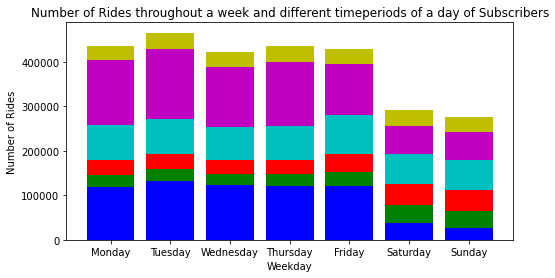

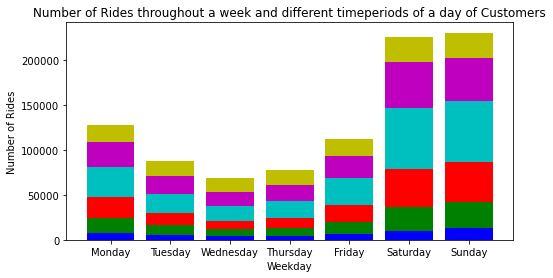

[[ 7843  5642  4428  4486  6530 10190 12698]
 [16718 10614  7491  8199 13296 26590 29776]
 [22605 13047  9503 11347 18895 41672 43796]
 [34237 21495 16271 19618 29912 67869 67949]
 [27594 20184 15783 17820 24241 51153 48343]
 [18196 16303 14776 15710 19254 28342 27762]]


In [52]:
#SUBSCRIBER
# Graph der die Anzahl der Fahrten innerhalb einer Woche und in verschiedenen Zeitperioden darstellt 
fig,ax = plt.subplots(figsize=(8,4))
weekdays_sub= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([morning_rides_sub, midmorning_rides_sub, noon_rides_sub, afternoon_rides_sub, evening_rides_sub, night_rides_sub])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays_sub, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week and different timeperiods of a day of Subscribers")

#CUSTOMER
# Graph der die Anzahl der Fahrten innerhalb einer Woche und in verschiedenen Zeitperioden darstellt 
fig,ax = plt.subplots(figsize=(8,4))
weekdays_cust= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([morning_rides_cust, midmorning_rides_cust, noon_rides_cust, afternoon_rides_cust, evening_rides_cust, night_rides_cust])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays_cust, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week and different timeperiods of a day of Customers")


plt.show()

[[12698 29776 43796 67949 48343 27762]
 [26396 38956 46260 68123 62606 33106]]


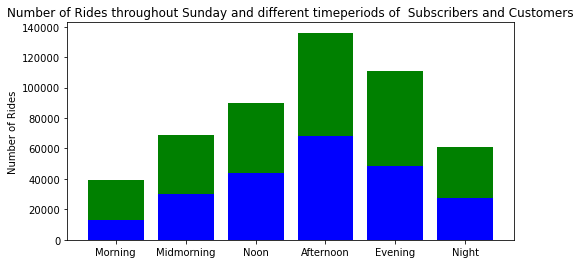

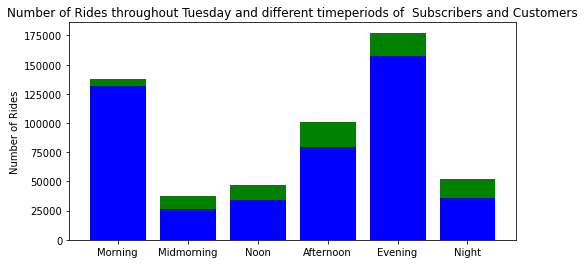

[[132047  26736  34276  79062 157189  35980]
 [  5642  10614  13047  21495  20184  16303]]


In [51]:
#Sunday
sunday_sub = np.array([morning_sunday_sub['Hour'].size, midmorning_sunday_sub['Hour'].size, noon_sunday_sub['Hour'].size, afternoon_sunday_sub['Hour'].size, evening_sunday_sub['Hour'].size, night_sunday_sub['Hour'].size])
sunday_cust = np.array([morning_sunday_cust['Hour'].size, midmorning_sunday_cust['Hour'].size, noon_sunday_cust['Hour'].size, afternoon_sunday_cust['Hour'].size, evening_sunday_cust['Hour'].size, night_sunday_cust['Hour'].size])



fig,ax = plt.subplots(figsize=(8,4))
day= ['Morning','Midmorning','Noon','Afternoon','Evening','Night']
data = np.array([sunday_cust, sunday_sub])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(day, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout Sunday and different timeperiods of  Subscribers and Customers")

print(data)
#Tuesday
tuesday_sub = np.array([morning_tuesday_sub['Hour'].size, midmorning_tuesday_sub['Hour'].size, noon_tuesday_sub['Hour'].size, afternoon_tuesday_sub['Hour'].size, evening_tuesday_sub['Hour'].size, night_tuesday_sub['Hour'].size])
tuesday_cust = np.array([morning_tuesday_cust['Hour'].size, midmorning_tuesday_cust['Hour'].size, noon_tuesday_cust['Hour'].size, afternoon_tuesday_cust['Hour'].size, evening_tuesday_cust['Hour'].size, night_tuesday_cust['Hour'].size])


fig,ax = plt.subplots(figsize=(8,4))
day= ['Morning','Midmorning','Noon','Afternoon','Evening','Night']
data = np.array([tuesday_sub, tuesday_cust])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(day, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout Tuesday and different timeperiods of  Subscribers and Customers")
plt.show()
print(data)

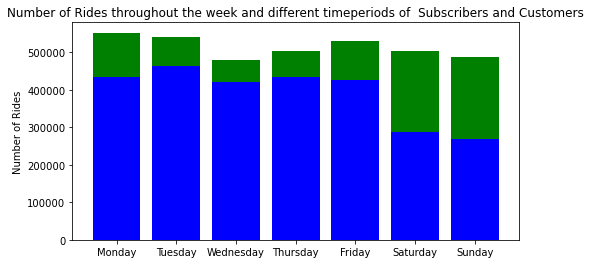

In [40]:
#Sunday
sub_monday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==0)]
sub_tuesday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==1)]
sub_wednesday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==2)]
sub_thursday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==3)]
sub_friday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==4)]
sub_saturday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==5)]
sub_sunday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==6)]
cust_monday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==0)]
cust_tuesday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==1)]
cust_wednesday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==2)]
cust_thursday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==3)]
cust_friday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==4)]
cust_saturday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==5)]
cust_sunday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==6)]

sub = np.array([sub_monday['start_time'].size, sub_tuesday['Hour'].size, sub_wednesday['Hour'].size, sub_thursday['Hour'].size, sub_friday['Hour'].size, sub_saturday['Hour'].size, sub_sunday['Hour'].size])
cust = np.array([cust_monday['start_time'].size, cust_tuesday['Hour'].size, cust_wednesday['Hour'].size, cust_thursday['Hour'].size, cust_friday['Hour'].size, cust_saturday['Hour'].size, cust_sunday['Hour'].size])

fig,ax = plt.subplots(figsize=(8,4))
weekdays= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

data = np.array([sub, cust])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout the week and different timeperiods of  Subscribers and Customers")

plt.show()

In [41]:
bikes = chicago['bike_id'].unique()
print(len(bikes))
anzahlTage = len(chicago["Date"].unique())
print(anzahlTage)  ##366 Tage --> richtig
montag = chicago[chicago["Weekday"]==0]
montage = montag["Date"].unique()
print(len(montag["Date"].unique()))   ##52 Montage in 2016 erfasst --> richtig

5748
366
52


In [45]:
morning_monday = morning_start[morning_start['Weekday']==0]
print(len(morning_monday["bike_id"].unique()))

morning_rides = np.array([morning_monday, morning_tuesday, morning_wednesday, morning_friday,  morning_saturday,  morning_sunday])
midmorning_rides = np.array([midmorning_monday , midmorning_tuesday , midmorning_wednesday ,  midmorning_thursday ,  midmorning_friday ,  midmorning_saturday ,  midmorning_sunday ])
noon_rides = np.array([noon_monday , noon_tuesday , noon_wednesday ,  noon_thursday ,  noon_friday , noon_saturday , noon_sunday ])
afternoon_rides = np.array([afternoon_monday , afternoon_tuesday , afternoon_wednesday ,  afternoon_thursday ,  afternoon_friday , afternoon_saturday , afternoon_sunday ])
evening_rides = np.array([evening_monday , evening_tuesday , evening_wednesday ,  evening_thursday ,  evening_friday , evening_saturday , evening_sunday ])
night_rides = np.array([night_monday , night_tuesday , night_wednesday ,  night_thursday ,  night_friday , night_saturday , night_sunday ])

5719


<ipython-input-45-f520184fde08>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  morning_rides = np.array([morning_monday, morning_tuesday, morning_wednesday, morning_friday,  morning_saturday,  morning_sunday])
<ipython-input-45-f520184fde08>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  midmorning_rides = np.array([midmorning_monday , midmorning_tuesday , midmorning_wednesday ,  midmorning_thursday ,  midmorning_friday ,  midmorning_saturday ,  midmorning_sunday ])
<ipython-input-45-f520184fde08>:6: VisibleDeprecationWarning: Creating an ndarray f

In [49]:
print("Auslastung von Fahrrädern über den Tag verteilt")
print("morning")
for i in range(morning_rides.size):
    temp = morning_rides[i]
    print(len(temp["bike_id"].unique()))
print(" ")
print("midmorning")
for i in range(midmorning_rides.size):
    temp = midmorning_rides[i]
    print(len(temp["bike_id"].unique()))
print(" ")
print("noon")
for i in range(noon_rides.size):
    temp = noon_rides[i]
    print(len(temp["bike_id"].unique()))
print(" ")
print("afternoon")
for i in range(afternoon_rides.size):
    temp = afternoon_rides[i]
    print(len(temp["bike_id"].unique()))
print(" ")
print("evening")
for i in range(evening_rides.size):
    temp = evening_rides[i]
    print(len(temp["bike_id"].unique()))
print(" ")
print("night")
for i in range(night_rides.size):
    temp = night_rides[i]
    print(len(temp["bike_id"].unique()))



Auslastung von Fahrrädern über den Tag verteilt
morning
5719
5724
5724
5729
5649
5611
 
midmorning
5643
5594
5562
5591
5642
5686
5688
 
noon
5676
5661
5607
5639
5685
5707
5693
 
afternoon
5713
5713
5704
5715
5722
5718
5715
 
evening
5720
5722
5717
5724
5723
5704
5700
 
night
5596
5616
5581
5627
5632
5644
5619


In [44]:
##Auslastung Monate
jan = chicago[chicago["Month"]==1]
print(len(jan["bike_id"].unique()))
feb = chicago[chicago["Month"]==2]
print(len(feb["bike_id"].unique()))
mer = chicago[chicago["Month"]==3]
print(len(mer["bike_id"].unique()))
apr = chicago[chicago["Month"]==4]
print(len(apr["bike_id"].unique()))
mai = chicago[chicago["Month"]==5]
print(len(mai["bike_id"].unique()))
juni = chicago[chicago["Month"]==6]
print(len(juni["bike_id"].unique()))
juli = chicago[chicago["Month"]==7]
print(len(juli["bike_id"].unique()))
aug = chicago[chicago["Month"]==8]
print(len(aug["bike_id"].unique()))
sep = chicago[chicago["Month"]==9]
print(len(sep["bike_id"].unique()))
okt = chicago[chicago["Month"]==10]
print(len(okt["bike_id"].unique()))
nov = chicago[chicago["Month"]==11]
print(len(nov["bike_id"].unique()))
dez = chicago[chicago["Month"]==12]
print(len(dez["bike_id"].unique()))


3402
3348
4258
4537
4600
5021
4895
5154
5159
5000
4513
3691


In [57]:

# Auslastung JANUAR

morning_start = chicago[(chicago["Month"]==1)&(chicago['Hour']>=6) & (chicago['Hour']<10)]
print(len(morning_start["bike_id"].unique()))
mid_morning_start = chicago[(chicago["Month"]==1)&(chicago['Hour']>=10) & (chicago['Hour']<12)]
print(len(mid_morning_start["bike_id"].unique()))
noon_start = chicago[(chicago["Month"]==1) &(chicago['Hour']>=12) & (chicago['Hour']<14)]
print(len(noon_start["bike_id"].unique()))
afternoon_start = chicago[(chicago["Month"]==1) &(chicago['Hour']>=14) & (chicago['Hour']<17)]
print(len(afternoon_start["bike_id"].unique()))
evening_start = chicago[(chicago["Month"]==1) &(chicago['Hour']>=17) & (chicago['Hour']<21)]
print(len(evening_start["bike_id"].unique()))
night_start = chicago[(chicago["Month"]==1) &((chicago['Hour']>=21) & (chicago['Hour']<24)) | ((chicago['Hour']>=0) & (chicago['Hour']<6))]
print(len(night_start["bike_id"].unique()))


##nachts umstellen der Fahrräder??

3273
2740
2865
3234
3303
5715


In [58]:
#Auslastung Juli

morning_start = chicago[(chicago["Month"]==7)&(chicago['Hour']>=6) & (chicago['Hour']<10)]
print(len(morning_start["bike_id"].unique()))
mid_morning_start = chicago[(chicago["Month"]==7)&(chicago['Hour']>=10) & (chicago['Hour']<12)]
print(len(mid_morning_start["bike_id"].unique()))
noon_start = chicago[(chicago["Month"]==7) &(chicago['Hour']>=12) & (chicago['Hour']<14)]
print(len(noon_start["bike_id"].unique()))
afternoon_start = chicago[(chicago["Month"]==7) &(chicago['Hour']>=14) & (chicago['Hour']<17)]
print(len(afternoon_start["bike_id"].unique()))
evening_start = chicago[(chicago["Month"]==7) &(chicago['Hour']>=17) & (chicago['Hour']<21)]
print(len(evening_start["bike_id"].unique()))
night_start = chicago[(chicago["Month"]==7) &((chicago['Hour']>=21) & (chicago['Hour']<24)) | ((chicago['Hour']>=0) & (chicago['Hour']<6))]
print(len(night_start["bike_id"].unique()))

4728
4702
4731
4781
4791
5718
